Sample Data:
   CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


e:\Ananconda\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\Ananconda\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\Ananconda\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
e:\Ananconda\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, 

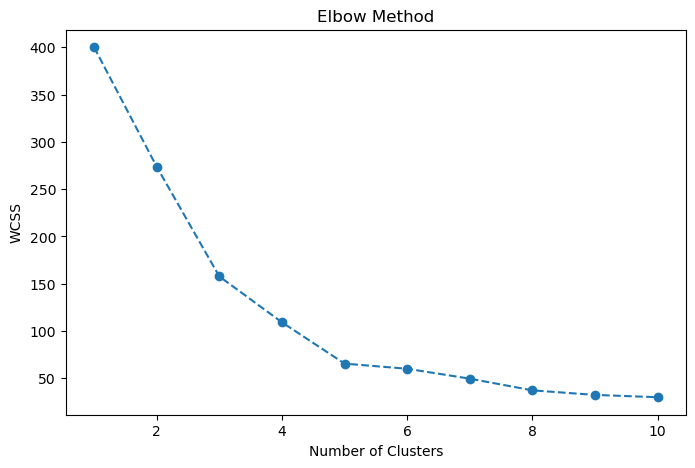

e:\Ananconda\Anaconda\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


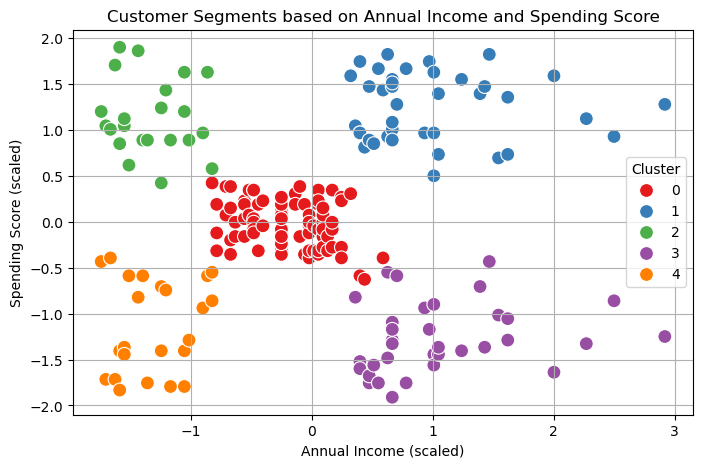


Segmented customer data saved as 'segmented_customers.csv'


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

#importing libraries

data = pd.read_csv("Mall_Customers.csv")  #read from file

print("Sample Data:")
print(data.head())

X = data[['Annual Income (k$)', 'Spending Score (1-100)']]  #selecting features

scaler = StandardScaler()               #object for the model
X_scaled = scaler.fit_transform(X)      #poulate the model

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)        #determining the number of clusters

plt.figure(figsize=(8,5))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()                              #plotting the elbow method


kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X_scaled)             #clustering using kmeans


data['Cluster'] = y_kmeans

plt.figure(figsize=(8,5))
sns.scatterplot(x=X_scaled[:,0], y=X_scaled[:,1], hue=y_kmeans, palette='Set1', s=100)
plt.title("Customer Segments based on Annual Income and Spending Score")
plt.xlabel("Annual Income (scaled)")
plt.ylabel("Spending Score (scaled)")
plt.legend(title="Cluster")
plt.grid(True)                                      #plotting after clustering based on the selected features
plt.show()

data.to_csv("segmented_customers.csv", index=False)
print("\nSegmented customer data saved as 'segmented_customers.csv'")           #saving the customers after clustering into a new csv file
